# Heart Disease Prediction using machine learning

In this notebook I have used machine learning and various libraries in order to make a model capable of 
predicting whether someone has heart disease based on their medical data

### Problem Statement

Predicting on the basis of clinical data whether the patient have a heart disease or not

### Data

This data is taken from Kaggle.
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

**Data Abbreviations**

`age`: Displays the age of the individual.

`sex`: Displays the gender of the individual using the following format : 1 = male 0 = female

`cp- Chest-pain type`: cp - chest pain type                                                                                 
             0: Typical angina: chest pain related decrease blood supply to the heart                                        
             1: Atypical angina: chest pain not related to heart                                                              
             2: Non-anginal pain: typically esophageal spasms (non heart related)                                              
             3: Asymptomatic: chest pain not showing signs of disease                                                          

`trestbps`- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). 
            anything above 130-140 is typically cause for concern.

`chol`- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

`fbs`- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.                               
       If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

`restecg`- Resting ECG : displays resting electrocardiographic results 
           0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

`thalach`- Max heart rate achieved : displays the max heart rate achieved by an individual.

`exang`- Exercise induced angina : 1 = yes 0 = no

`oldpeak`- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

`slope`- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 
            1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

`ca`- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

`thal` : Displays the thalassemia :                                                                           
         1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement excercising

`target` : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no;

In [1]:
#importing libraries for data analysis
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.ensemble     import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()
print("")
df["target"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB



1    165
0    138
Name: target, dtype: int64

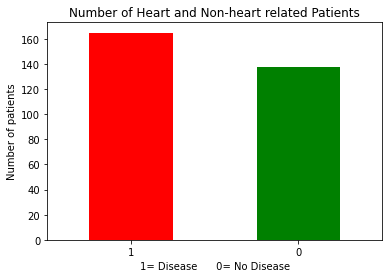

In [5]:
df["target"].value_counts().plot(kind="bar", color=["red", "green"],label='_nolegend_');
plt.title("Number of Heart and Non-heart related Patients")
plt.xlabel("1= Disease      0= No Disease")
plt.ylabel("Number of patients")
plt.xticks(rotation=0);

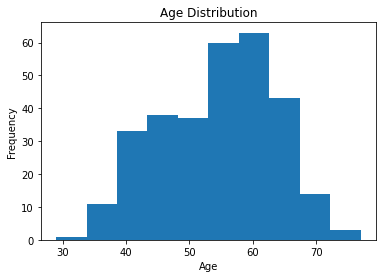

In [6]:
#Age distribution (histogram)
df.age.plot.hist()
plt.title("Age Distribution")
plt.xlabel("Age");

In [7]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


### Heart Disease Frequency as per Sex

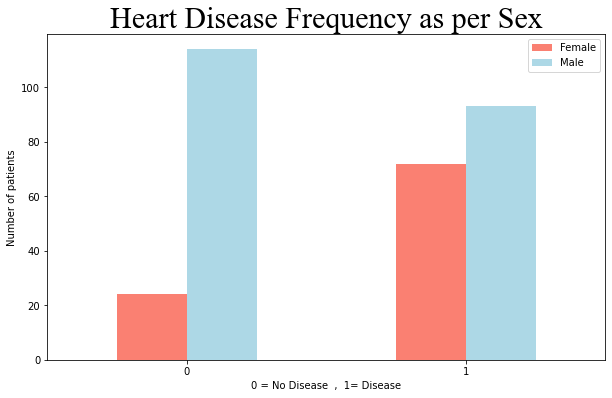

In [8]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
font1 = {'family': 'Times New Roman',
         'color':  'Black',
         'weight': 'medium',
         'size':30}
plt.title("Heart Disease Frequency as per Sex",fontdict=font1)
plt.xlabel("0 = No Disease  ,  1= Disease")
plt.ylabel("Number of patients")
plt.legend(["Female",'Male'])
plt.xticks(rotation=0);

### Max Heart Rate as per Age

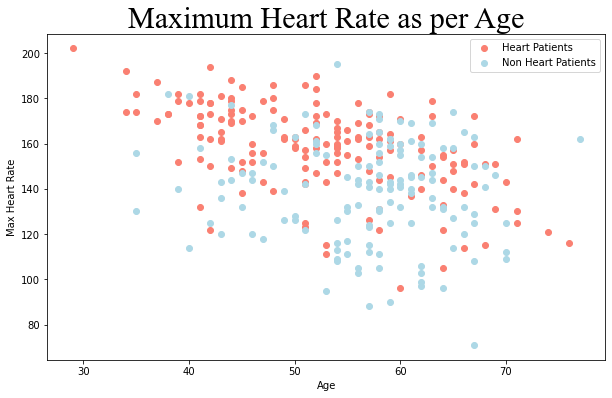

In [9]:
plt.figure(figsize=(10,6))
# Age and heart of a non disease patient(target=1) 
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Age and heart of a non disease patient(target=0)
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

font1 = {'family': 'Times New Roman',
         'color':  'Black',
         'weight': 'medium',
         'size':30}
plt.title("Maximum Heart Rate as per Age",fontdict=font1)
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Patients",'Non Heart Patients']);

### Heart Disease Frequency as per Chest Pain Type

cp-**Chest-pain type**: displays the type of chest-pain experienced by the individual using the following format:  


0:  `Typical angina`:  chest pain related decrease blood supply to the heart                                             
1:  `Atypical angina`:  chest pain not related to heart                                                                         
2:  `Non-anginal pain`:  typically esophageal spasms (non heart related)                                                        
3:  `Asymptomatic: chest`:  pain not showing signs of disease                                               

In [10]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


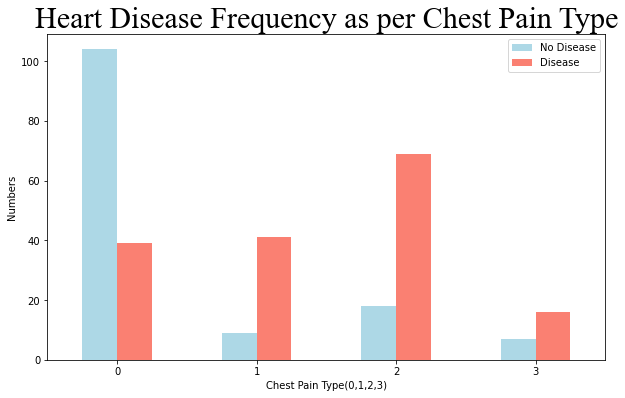

In [11]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["lightblue","salmon"])
font1 = {'family': 'Times New Roman',
         'color':  'Black',
         'weight': 'medium',
         'size':30}
plt.title("Heart Disease Frequency as per Chest Pain Type",fontdict=font1)
plt.xlabel("Chest Pain Type(0,1,2,3)")
plt.ylabel("Numbers")
plt.legend(["No Disease",'Disease']);
plt.xticks(rotation=0);

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
#Corelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


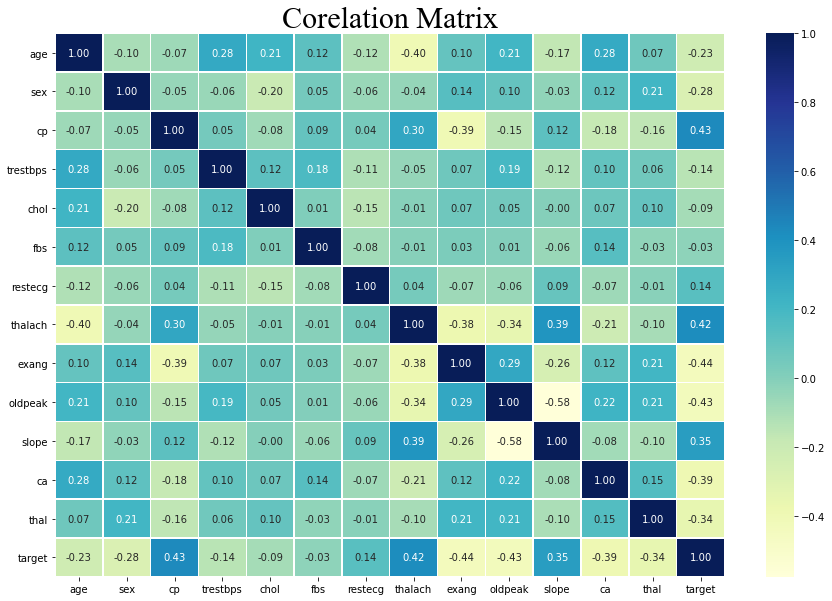

In [53]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");
font1 = {'family': 'Times New Roman',
         'color':  'Black',
         'weight': 'medium',
         'size':30}
plt.title("Corelation Matrix",fontdict=font1);

## Modelling 

In [15]:
#Splitting the data
X=df.drop("target",axis=1)
y=df["target"]

In [16]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [18]:
#Split data for training and testing sets
np.random.seed(42)

X_train,X_test,y_train,y_test= train_test_split(X,
                                                y,
                                                test_size=0.2)

In [19]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [20]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

## Trying models
* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [36]:
models={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest" : RandomForestClassifier()}
#func to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores    

In [37]:
model_scores=fit_and_score(models=models,
                          X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test=y_test)
model_scores

C:\Users\balun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparisons

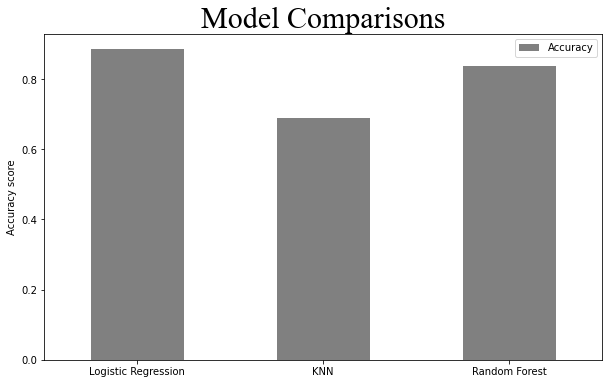

In [50]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar(figsize=(10,6),color="Gray")
font1 = {'family': 'Times New Roman',
         'color':  'Black',
         'weight': 'medium',
         'size':30}
plt.title("Model Comparisons",fontdict=font1)
plt.ylabel("Accuracy score")
plt.xticks(rotation=0);

Now as the baseline model is selected it is now processed to
* hyperparameter tuning
* Confusion matrix
* Correlation matrix
* Precision
* Classification Report
* F1 score
* ROC curve
* AOC(Area under the curve)
* Cross validation

## Hyperparameter Tuning

#### KNN

In [69]:
train_scores=[]
test_scores =[]

neighbors =range(1,21)

knn =KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

In [70]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [71]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score data:75.41%


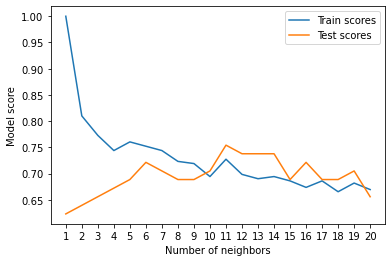

In [75]:
plt.plot(neighbors,train_scores,label="Train scores")
plt.plot(neighbors,test_scores,label="Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Max KNN score data:{max(test_scores)*100:.2f}%")

## Hyperparameter Tuning with RandomizedSearchCV

* Logistic Regression
* RandomForestClassifier

In [176]:
#creating hyperparameter grids for logistic Regression 
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

#creating hyperparameter grids for RandomForestClassifier
rf_grid={"bootstrap": [True],
    "max_depth": [80, 90, 100, 110],
    "max_features": [2, 3],
    "min_samples_leaf": [3, 4, 5],
    "min_samples_split": [8, 10, 12],
    "n_estimators": [100, 200, 300, 1000]}

Now tune logistic regression using RandomisedSearchCV...

In [159]:
np.random.seed(42)
#Setting random hyperparameter search for Logistic Regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
#Fitting  random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [166]:
#finding best hyperparameter
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [170]:
#Evaluating the randomised search Logistic Regression model
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now tune RandomForestClassifier() using RandomisedSearchCV...

In [171]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]},
                   verbose=True)

In [174]:
#finding best hyperparameter
rs_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_features': 2,
 'max_depth': 110,
 'bootstrap': True}

In [175]:
#Evaluating the randomised search RFC model
rs_rf.score(X_test,y_test)

0.8688524590163934

### Hyperparameter Tuning with GridSearchCV
As the logisticRegression has the best record so we tune it extensively

In [208]:
#Diff parameters for logisticRegression model
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":['liblinear'],
              "penalty":['l2']}

#Setup grid hyperparameter
gs_log_reg=GridSearchCV(LogisticRegression(),
                              param_grid=log_reg_grid,
                              cv=5,
                              verbose=True)

#Fitting grid hyperparameter model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [209]:
##finding best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [210]:
#Evaluating the Grid search Logistic Regression model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [211]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating the ML Classifier on basis of
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [212]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [213]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

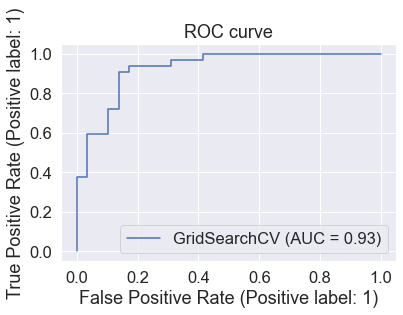

In [223]:
plot_roc_curve(gs_log_reg, X_test, y_test);
plt.title("ROC curve");

In [216]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


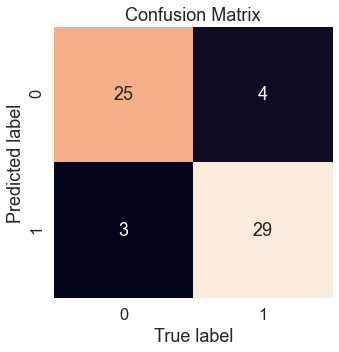

In [232]:
def plot_conf_mat(y_test, y_preds):
    """to plot confusion matrix using Seaborn's heatmap()"""
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.title("Confusion Matrix")
plot_conf_mat(y_test, y_preds)

In [225]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation


Now repeat the same but with `cross_val_score()`
calculate: accuracy,precision,recall,,f1-score

In [234]:
# best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [235]:
# Creating a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [236]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [237]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [238]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [239]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [240]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

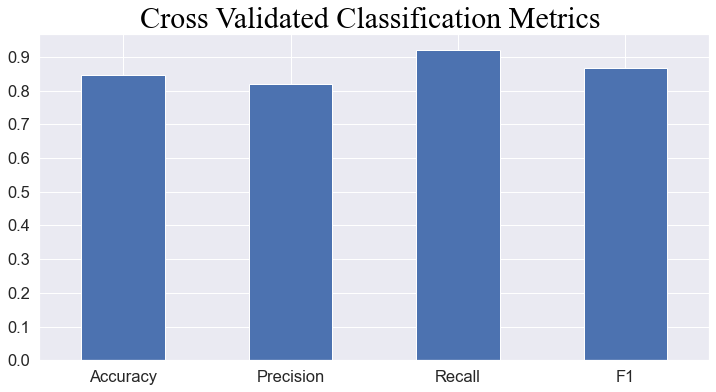

In [253]:
#Plotting cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

font1 = {'family': 'Times New Roman',
         'color':  'Black',
         'weight': 'medium',
         'size':30}
cv_metrics.T.plot.bar(legend=False,figsize=(12,6));
plt.title("Cross Validated Classification Metrics ",fontdict=font1);
plt.xticks(rotation=0);
plt.yticks(np.arange(0,1,0.1));

In [254]:
import pickle

pickle.dump(clf,open("end-to-end-heart-disease-classification.pkl","wb"))

In [257]:
loaded_model=pickle.load(open("end-to-end-heart-disease-classification.pkl","rb"))
print(loaded_model)

LogisticRegression(C=0.20433597178569418, solver='liblinear')
